In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader

In [2]:
gen_df = pd.read_csv('./data/Plant_1_Generation_Data.csv')
weather_df = pd.read_csv('./data/Plant_1_Weather_Sensor_Data.csv')

In [3]:
gen_df

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,15-05-2020 00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.000,6259559.0
1,15-05-2020 00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.000,6183645.0
2,15-05-2020 00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.000,6987759.0
3,15-05-2020 00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.000,7602960.0
4,15-05-2020 00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.000,7158964.0
...,...,...,...,...,...,...,...
68773,17-06-2020 23:45,4135001,uHbuxQJl8lW7ozc,0.0,0.0,5967.000,7287002.0
68774,17-06-2020 23:45,4135001,wCURE6d3bPkepu2,0.0,0.0,5147.625,7028601.0
68775,17-06-2020 23:45,4135001,z9Y9gH1T5YWrNuG,0.0,0.0,5819.000,7251204.0
68776,17-06-2020 23:45,4135001,zBIq5rxdHJRwDNY,0.0,0.0,5817.000,6583369.0


In [4]:
gen_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68778 entries, 0 to 68777
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE_TIME    68778 non-null  object 
 1   PLANT_ID     68778 non-null  int64  
 2   SOURCE_KEY   68778 non-null  object 
 3   DC_POWER     68778 non-null  float64
 4   AC_POWER     68778 non-null  float64
 5   DAILY_YIELD  68778 non-null  float64
 6   TOTAL_YIELD  68778 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 3.7+ MB


In [5]:
gen_df.describe()

,PLANT_ID,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
count,68778.0,68778.000000,68778.000000,68778.000000,6.877800e+04
mean,4135001.0,3147.426211,307.802752,3295.968737,6.978712e+06
std,0.0,4036.457169,394.396439,3145.178309,4.162720e+05
min,4135001.0,0.000000,0.000000,0.000000,6.183645e+06
25%,4135001.0,0.000000,0.000000,0.000000,6.512003e+06
50%,4135001.0,429.000000,41.493750,2658.714286,7.146685e+06
75%,4135001.0,6366.964286,623.618750,6274.000000,7.268706e+06
max,4135001.0,14471.125000,1410.950000,9163.000000,7.846821e+06


In [6]:
weather_df.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
1,2020-05-15 00:15:00,4135001,HmiyD2TTLFNqkNe,25.084589,22.761668,0.0
2,2020-05-15 00:30:00,4135001,HmiyD2TTLFNqkNe,24.935753,22.592306,0.0
3,2020-05-15 00:45:00,4135001,HmiyD2TTLFNqkNe,24.846130,22.360852,0.0
4,2020-05-15 01:00:00,4135001,HmiyD2TTLFNqkNe,24.621525,22.165423,0.0


In [7]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DATE_TIME            3182 non-null   object 
 1   PLANT_ID             3182 non-null   int64  
 2   SOURCE_KEY           3182 non-null   object 
 3   AMBIENT_TEMPERATURE  3182 non-null   float64
 4   MODULE_TEMPERATURE   3182 non-null   float64
 5   IRRADIATION          3182 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 149.3+ KB


In [8]:
weather_df.describe()

,PLANT_ID,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
count,3182.0,3182.000000,3182.000000,3182.000000
mean,4135001.0,25.531606,31.091015,0.228313
std,0.0,3.354856,12.261222,0.300836
min,4135001.0,20.398505,18.140415,0.000000
25%,4135001.0,22.705182,21.090553,0.000000
50%,4135001.0,24.613814,24.618060,0.024653
75%,4135001.0,27.920532,41.307840,0.449588
max,4135001.0,35.252486,65.545714,1.221652


##### Convert timestamp

In [9]:
gen_df['DATE_TIME'] = pd.to_datetime(gen_df['DATE_TIME'], format='%d-%m-%Y %H:%M')
weather_df['DATE_TIME'] = pd.to_datetime(weather_df['DATE_TIME'], format='%Y-%m-%d %H:%M:%S')

In [10]:
gen_df.head(1)

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0


In [ ]:
gen_agg = gen_df.groupby('DATE_TIME').agg({
    'DC_POWER': 'sum',
    'AC_POWER': 'sum',
    'DAILY_YIELD': 'mean',       
    'TOTAL_YIELD': 'mean'        
}).reset_index()


gen_agg.head()

,DATE_TIME,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15 00:00:00,0.0,0.0,0.0,6.837223e+06
1,2020-05-15 00:15:00,0.0,0.0,0.0,6.837223e+06
2,2020-05-15 00:30:00,0.0,0.0,0.0,6.837223e+06
3,2020-05-15 00:45:00,0.0,0.0,0.0,6.837223e+06
4,2020-05-15 01:00:00,0.0,0.0,0.0,6.852802e+06


In [ ]:
df = pd.merge(gen_agg, weather_df, on='DATE_TIME')
df.head()

,DATE_TIME,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,0.0,0.0,0.0,6.837223e+06,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
1,2020-05-15 00:15:00,0.0,0.0,0.0,6.837223e+06,4135001,HmiyD2TTLFNqkNe,25.084589,22.761668,0.0
2,2020-05-15 00:30:00,0.0,0.0,0.0,6.837223e+06,4135001,HmiyD2TTLFNqkNe,24.935753,22.592306,0.0
3,2020-05-15 00:45:00,0.0,0.0,0.0,6.837223e+06,4135001,HmiyD2TTLFNqkNe,24.846130,22.360852,0.0
4,2020-05-15 01:00:00,0.0,0.0,0.0,6.852802e+06,4135001,HmiyD2TTLFNqkNe,24.621525,22.165423,0.0


In [13]:
df["AC_POWER"].max()

29150.212499

In [14]:
df = df.drop(columns=['PLANT_ID', 'SOURCE_KEY'])

##### extract time based feature

In [15]:
df['HOUR'] = df['DATE_TIME'].dt.hour
df['DAY'] = df['DATE_TIME'].dt.day
df['DAY_OF_WEEK'] = df['DATE_TIME'].dt.dayofweek
df['MONTH'] = df['DATE_TIME'].dt.month

##### visualization of data

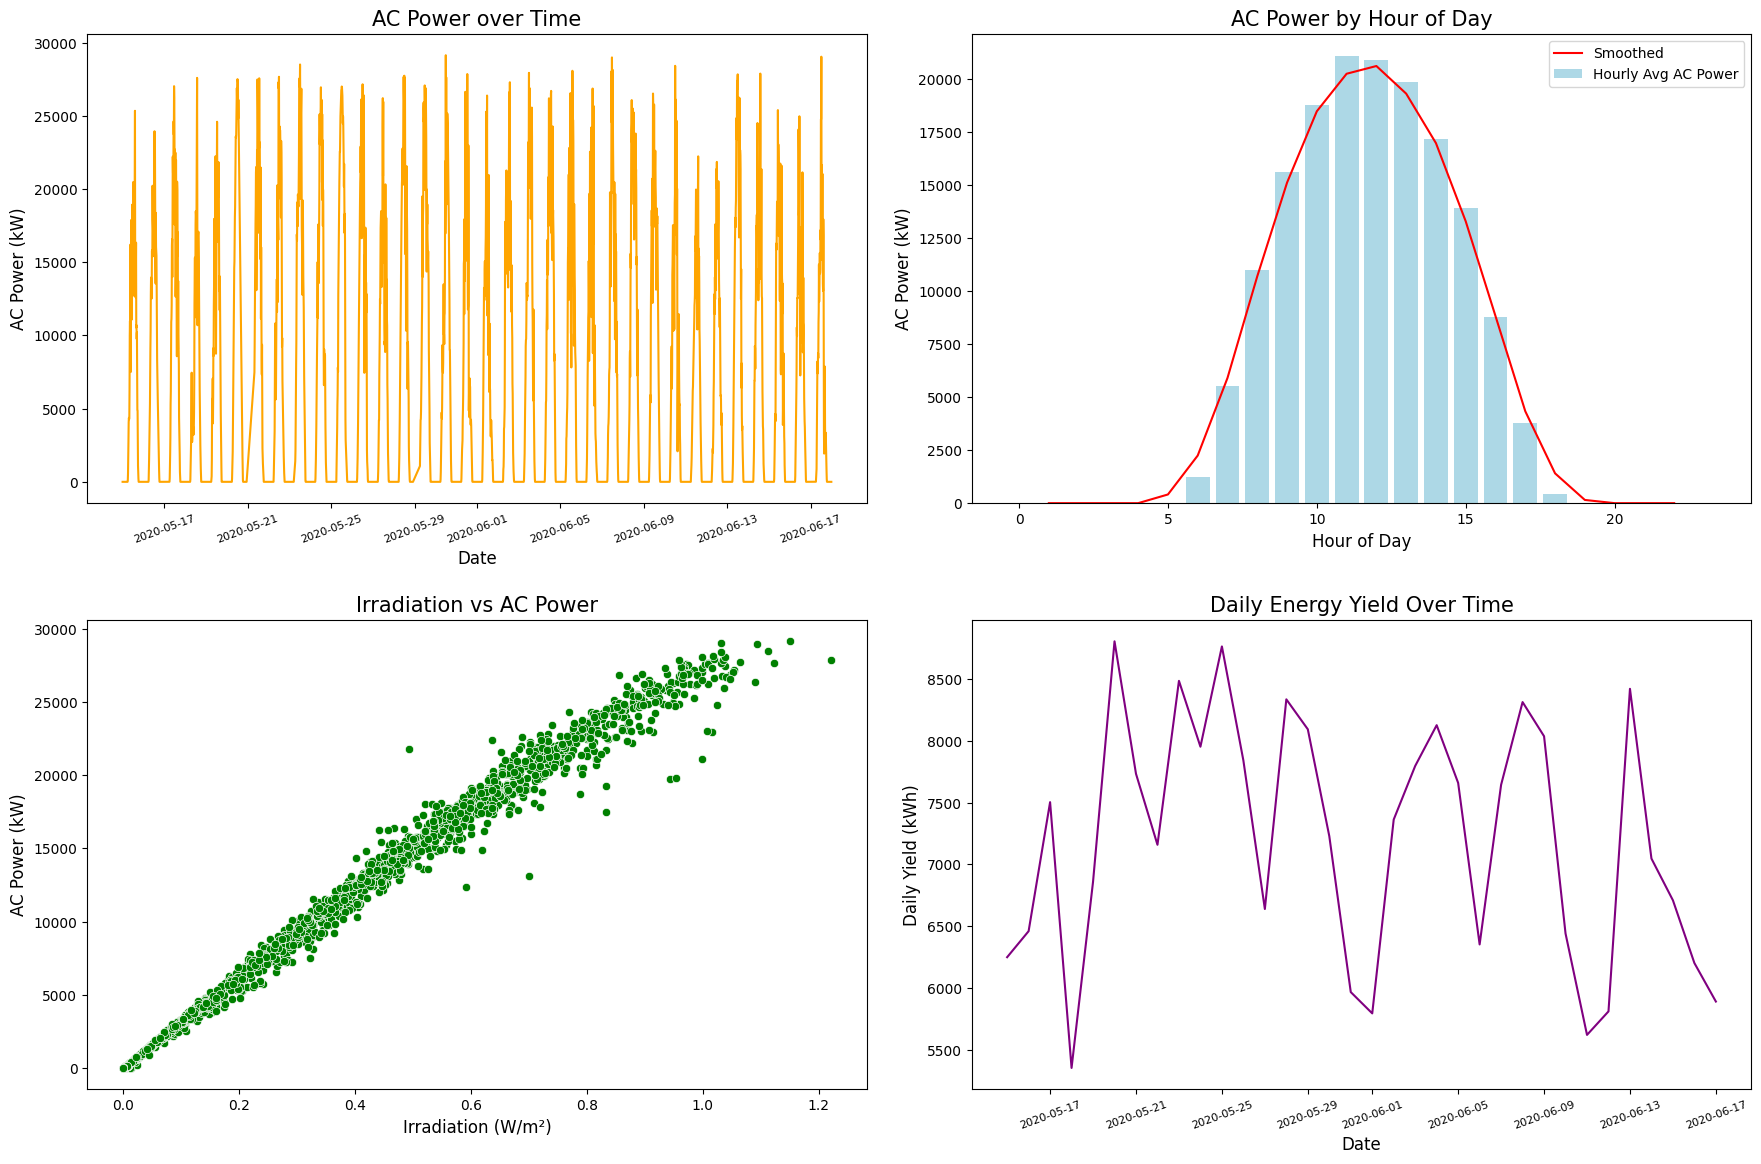

In [16]:
plt.figure(figsize=(18, 12))

# 1. AC power over time
plt.subplot(2, 2, 1)
plt.plot(df["DATE_TIME"], df["AC_POWER"], c="orange")
plt.title("AC Power over Time", fontsize=15)
plt.xlabel("Date", fontsize=12)
plt.ylabel("AC Power (kW)", fontsize=12)  
plt.xticks(rotation=20, fontsize=8)

# 2. AC Power by Hour of Day
hourly_avg = df.groupby('HOUR')['AC_POWER'].mean()
plt.subplot(2, 2, 2)
# sns.boxplot(data=df, x='HOUR', y='AC_POWER')
plt.plot(hourly_avg.index, hourly_avg.rolling(window=3, center=True).mean(), c='r', label='Smoothed')
plt.bar(hourly_avg.index, hourly_avg.values, color='lightblue', label='Hourly Avg AC Power')
plt.title("AC Power by Hour of Day", fontsize=15)
plt.xlabel("Hour of Day", fontsize=12)
plt.ylabel("AC Power (kW)", fontsize=12)  
plt.legend()

# 3. Irradiation vs AC Power
plt.subplot(2, 2, 3)
sns.scatterplot(x='IRRADIATION', y='AC_POWER', data=df, color = 'g')
plt.title('Irradiation vs AC Power', fontsize=15)
plt.xlabel('Irradiation (W/m²)', fontsize=12)  
plt.ylabel('AC Power (kW)', fontsize=12)       

# 4. Daily Yield Trend
plt.subplot(2, 2, 4)
daily_yield = df.groupby(df['DATE_TIME'].dt.date)['DAILY_YIELD'].max()
plt.plot(daily_yield.index, daily_yield.values, c='purple')
plt.title('Daily Energy Yield Over Time', fontsize=15)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Daily Yield (kWh)', fontsize=12)   
plt.xticks(rotation=20, fontsize=8)

plt.tight_layout(pad=2)
plt.show()


#### Data Preparation

In [17]:
df.head()

,DATE_TIME,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,HOUR,DAY,DAY_OF_WEEK,MONTH
0,2020-05-15 00:00:00,0.0,0.0,0.0,6.837223e+06,25.184316,22.857507,0.0,0,15,4,5
1,2020-05-15 00:15:00,0.0,0.0,0.0,6.837223e+06,25.084589,22.761668,0.0,0,15,4,5
2,2020-05-15 00:30:00,0.0,0.0,0.0,6.837223e+06,24.935753,22.592306,0.0,0,15,4,5
3,2020-05-15 00:45:00,0.0,0.0,0.0,6.837223e+06,24.846130,22.360852,0.0,0,15,4,5
4,2020-05-15 01:00:00,0.0,0.0,0.0,6.852802e+06,24.621525,22.165423,0.0,1,15,4,5


In [18]:
df = df.copy()
df['TARGET'] = df['AC_POWER'].shift(-1)
df = df.dropna()

X = df[['IRRADIATION', 'AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'HOUR']]
y = df['TARGET'].values.reshape(-1,1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2524, 4), (632, 4), (2524, 1), (632, 1))

In [21]:
# Scale features
x_scaler = StandardScaler()
X_train_scaled = x_scaler.fit_transform(X_train)
X_test_scaled = x_scaler.transform(X_test)

# Scale target separately
y_scaler = StandardScaler()
y_train_scaled = y_scaler.fit_transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

#### Converting data into tensor

In [22]:
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_scaled, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test_scaled, dtype=torch.float32)


train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

### ANN Model

In [23]:
class SolarANN(nn.Module):
    def __init__(self, in_dim):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(in_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1)
        )

    def forward(self, x):
        return self.model(x)

In [24]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Device : {device}")

Device : cpu


In [25]:
model = SolarANN(X_train.shape[1])
model.to(device)

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [26]:
epochs = 100

for epoch in range(epochs):
    epoch_loss = 0

    for features, labels in train_loader:
        features, labels = features.to(device), labels.to(device)

        optimizer.zero_grad()
        output = model(features)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()

    if (epoch + 1) % 10 == 0:
        print(f"Epoch : {epoch+1} , Loss = {loss.item():4f}")

Epoch : 10 , Loss = 0.047425
Epoch : 20 , Loss = 0.041521
Epoch : 30 , Loss = 0.114580
Epoch : 40 , Loss = 0.044048
Epoch : 50 , Loss = 0.072498
Epoch : 60 , Loss = 0.315340
Epoch : 70 , Loss = 0.027006
Epoch : 80 , Loss = 0.024375
Epoch : 90 , Loss = 0.059761
Epoch : 100 , Loss = 0.103158


In [27]:
import os
from joblib import dump, load

os.makedirs("Solar_ANN", exist_ok=True)
dump(x_scaler, './Solar_ANN/x_scaler.joblib') 
dump(y_scaler, './Solar_ANN/y_scaler.joblib')
torch.save(model.state_dict(), "./Solar_ANN/solar_ann_model.pth")

##### Loading the model

In [28]:
model = SolarANN(X_train.shape[1])  # Recreate the model architecture
model.load_state_dict(torch.load("./Solar_ANN/solar_ann_model.pth"))
model.to(device)

SolarANN(
  (model): Sequential(
    (0): Linear(in_features=4, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=32, bias=True)
    (5): ReLU()
    (6): Linear(in_features=32, out_features=1, bias=True)
  )
)

##### Evaluation

In [29]:
model.eval()

all_preds = []
all_targets = []

with torch.no_grad():
    for features, labels in test_loader:
        features, labels = features.to(device), labels.to(device)
        outputs = model(features)

        all_preds.append(outputs.cpu())
        all_targets.append(labels.cpu())

preds = torch.cat(all_preds).numpy()
targets = torch.cat(all_targets).numpy()

mse = (mean_squared_error(targets, preds))
r2score = r2_score(targets, preds)

print(f"mse : {mse}")
print(f"R2 score : {r2score}")

mse : 0.0632808655500412
R2 score : 0.9333760142326355


In [30]:
with torch.no_grad():
    outputs = model(torch.tensor(X_test_scaled, dtype=torch.float32).to(device))
    outputs = outputs.cpu().numpy()
    targets = y_test_scaled   # whichever version you're using

    preds_rounded = np.round(outputs)
    targets_rounded = np.round(targets)

    accuracy = np.mean(preds_rounded == targets_rounded)
    print(f"Rounded Accuracy: {accuracy:.4f}")


Rounded Accuracy: 0.8861


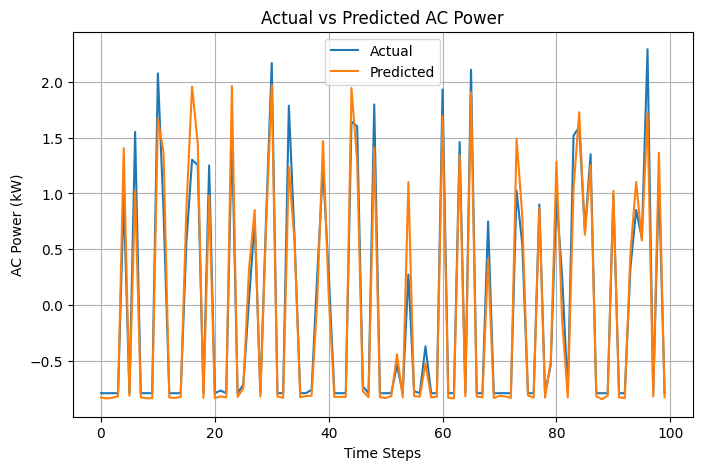

In [31]:
plt.figure(figsize=(8,5))
plt.plot(targets[:100], label='Actual')
plt.plot(preds[:100], label='Predicted')
plt.legend()
plt.title('Actual vs Predicted AC Power')
plt.xlabel('Time Steps')
plt.ylabel('AC Power (kW)')
plt.grid(True)
plt.show()


In [ ]:
import requests
from datetime import datetime
import warnings

warnings.filterwarnings("ignore")

API_KEY = "c7a1e5347b9b47dcdcefb11e9ab63ad9"

city = input("Enter city name: ")

geo_url = f"http://api.openweathermap.org/geo/1.0/direct?q={city}&appid={API_KEY}"
geo_data = requests.get(geo_url).json()

if not geo_data:
    print("❌ City not found.")
    exit()

lat, lon = geo_data[0]['lat'], geo_data[0]['lon']

weather_url = f"https://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid={API_KEY}&units=metric"
weather_data = requests.get(weather_url).json()

temp = weather_data['main']['temp']
clouds = weather_data['clouds']['all']
current_hour = datetime.now().hour

sunrise = datetime.fromtimestamp(weather_data['sys']['sunrise'])
sunset = datetime.fromtimestamp(weather_data['sys']['sunset'])
now = datetime.now()

is_daylight = sunrise <= now <= sunset

if is_daylight:
    day_duration = (sunset - sunrise).total_seconds()
    elapsed = (now - sunrise).total_seconds()
    irradiation = 1000 * np.sin(np.pi * elapsed/day_duration)  # Bell curve
    irradiation *= (100 - min(clouds, 90))/100  # Cloud reduction
else:
    irradiation = 0
    
X_input = np.array([[min(irradiation / 1000, 1.0), temp, temp + 5,  current_hour]])
X_scaled = x_scaler.transform(X_input)

with torch.no_grad():
    X_tensor = torch.tensor(X_scaled, dtype=torch.float32).to(device)
    prediction = model(X_tensor).cpu().numpy()
    prediction_kw = y_scaler.inverse_transform(prediction)[0][0]

final_pred = max(0, prediction_kw) if irradiation > 0.01 else 0

print("\n--- Solar Power Prediction ---")
print(f"Location: {city} ({lat:.2f}°N, {lon:.2f}°E)")
print(f"Local Time: {now.strftime('%Y-%m-%d %H:%M')}")
print(f"Sunrise: {sunrise.strftime('%H:%M')}")
print(f"Sunset: {sunset.strftime('%H:%M')}")
print(f"\n🔆 Daylight: {'Yes 🌞' if is_daylight else 'No 🌙'}")
print(f"🌡️ Temp: {temp} °C")
print(f"☁️ Cloud Cover: {clouds}%")
print(f"🔆 Solar Irradiation: {irradiation:.3f} kW/m²")
print(f"\n⚡ Predicted AC Power for next hour: {final_pred:.2f} W")


--- Solar Power Prediction ---
Location: Seoul (37.57°N, 126.98°E)
Local Time: 2025-04-15 16:21
Sunrise: 02:27
Sunset: 15:36

🔆 Daylight: No 🌙
🌡️ Temp: 9.76 °C
☁️ Cloud Cover: 15%
🔆 Solar Irradiation: 0.000 kW/m²

⚡ Predicted AC Power for next hour: 0.00 W
